In [428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [429]:
pd.set_option('display.max_columns', 30)

In [430]:
df = pd.read_csv('Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [432]:
missing_data = df.isnull().sum()
missing_data

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [433]:
df.duplicated().value_counts()

False    205
Name: count, dtype: int64

In [434]:
df.replace('?', np.nan, inplace = True)

In [435]:
df['normalized-losses']=df['normalized-losses'].astype(float)
df['bore']=df['bore'].astype(float)
df['stroke']=df['stroke'].astype(float)
df['horsepower']=df['horsepower'].astype(float)
df['peak-rpm']=df['peak-rpm'].astype(float)
df['price']=df['price'].astype(float)

In [436]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [437]:
missing_data = df.isnull().sum()
missing_data

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

After replacing all the "?", we have empty values. Checking how best to fill in blank data using the example of normalized-losses. Because normalized-losses contains the largest amount of missing data

In [438]:
not_empty_losses = df[~df['normalized-losses'].isnull()]
not_empty_losses

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


## Let's look at the distribution of normalized-losses data by excluding empty values. 

<Axes: ylabel='Frequency'>

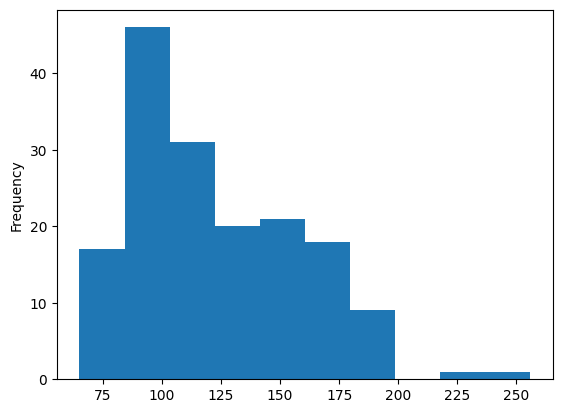

In [439]:
not_empty_losses['normalized-losses'].plot(kind='hist')

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


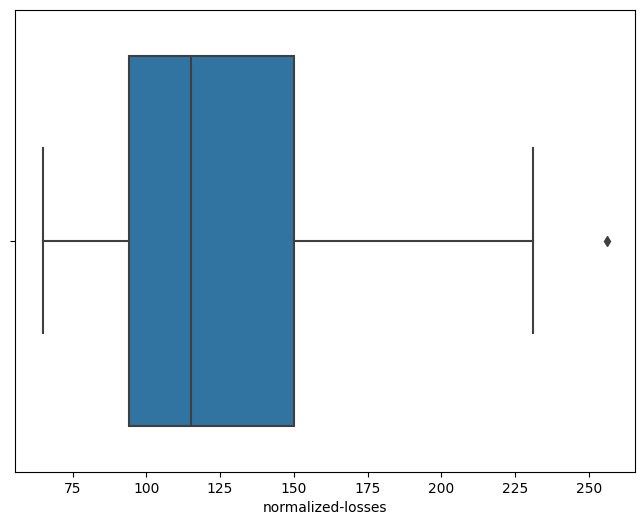

In [440]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='normalized-losses', data=not_empty_losses)
plt.show()

In [441]:
df['normalized-losses'] = df['normalized-losses'].astype(float)


## Compare the distribution of normalized-losses data by filling in the blank values with mode, median, and mean.

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


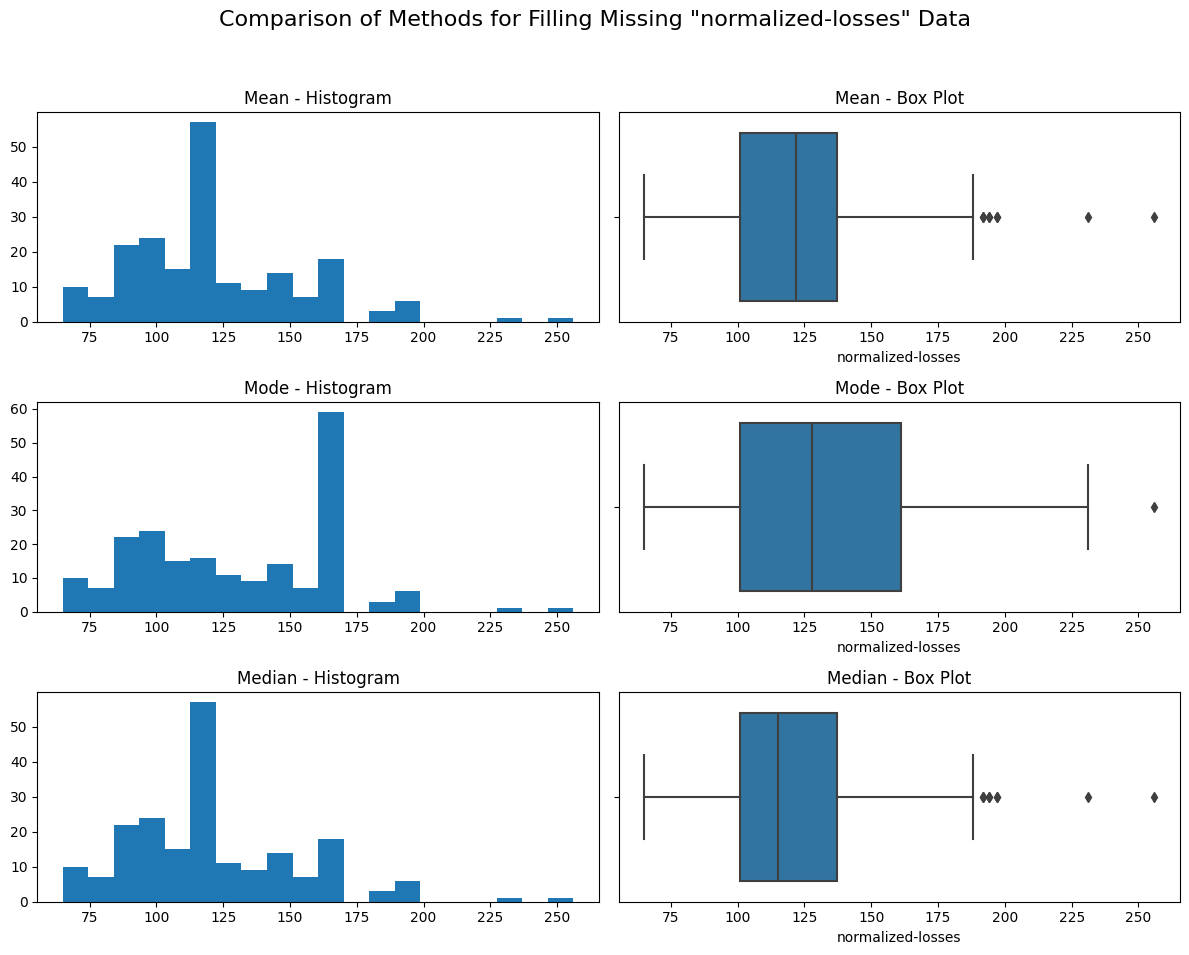

In [442]:
methods = ['Mean', 'Mode', 'Median']
values = [df['normalized-losses'].mean(), df['normalized-losses'].mode()[0], df['normalized-losses'].median()]
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Comparison of Methods for Filling Missing "normalized-losses" Data', fontsize=16)

for i, method in enumerate(methods):
    filled_df = df.copy()
    filled_df['normalized-losses'].fillna(values[i], inplace=True)
    axes[i, 0].hist(filled_df['normalized-losses'], bins=20)
    axes[i, 0].set_title(f'{method} - Histogram')
    sns.boxplot(x='normalized-losses', data=filled_df, ax=axes[i, 1])
    axes[i, 1].set_title(f'{method} - Box Plot')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Fill all empty values with a mode

In [443]:
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [444]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [445]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [446]:
numerical_df = df.select_dtypes(include=['int', 'float'])
numerical_df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,161.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,161.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,161.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


## Calculate basic statistics for numeric columns, such as mean, median, minimum, and maximum values.

In [447]:
mean_val = numerical_df.mean()
median_val = numerical_df.median()
min_val = numerical_df.min()
max_val = numerical_df.max()
stat_df = pd.DataFrame({
    'Mean': mean_val,
    'Median': median_val,
    'Min': min_val,
    'Max': max_val
})
stat_df = stat_df.round(2)
stat_df

,Mean,Median,Min,Max
symboling,0.83,1.00,-2.00,3.00
normalized-losses,129.80,128.00,65.00,256.00
wheel-base,98.76,97.00,86.60,120.90
length,174.05,173.20,141.10,208.10
width,65.91,65.50,60.30,72.30
height,53.72,54.10,47.80,59.80
curb-weight,2555.57,2414.00,1488.00,4066.00
engine-size,126.91,120.00,61.00,326.00
bore,3.34,3.31,2.54,3.94
stroke,3.26,3.29,2.07,4.17


## Create histograms for the number columns to determine their distributions.

<Axes: ylabel='Frequency'>

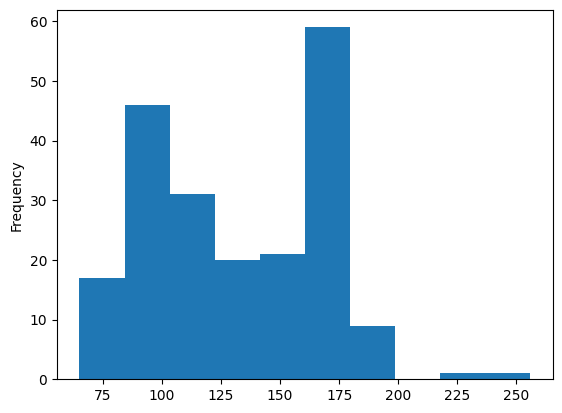

In [448]:
numerical_df['normalized-losses'].plot(kind='hist')


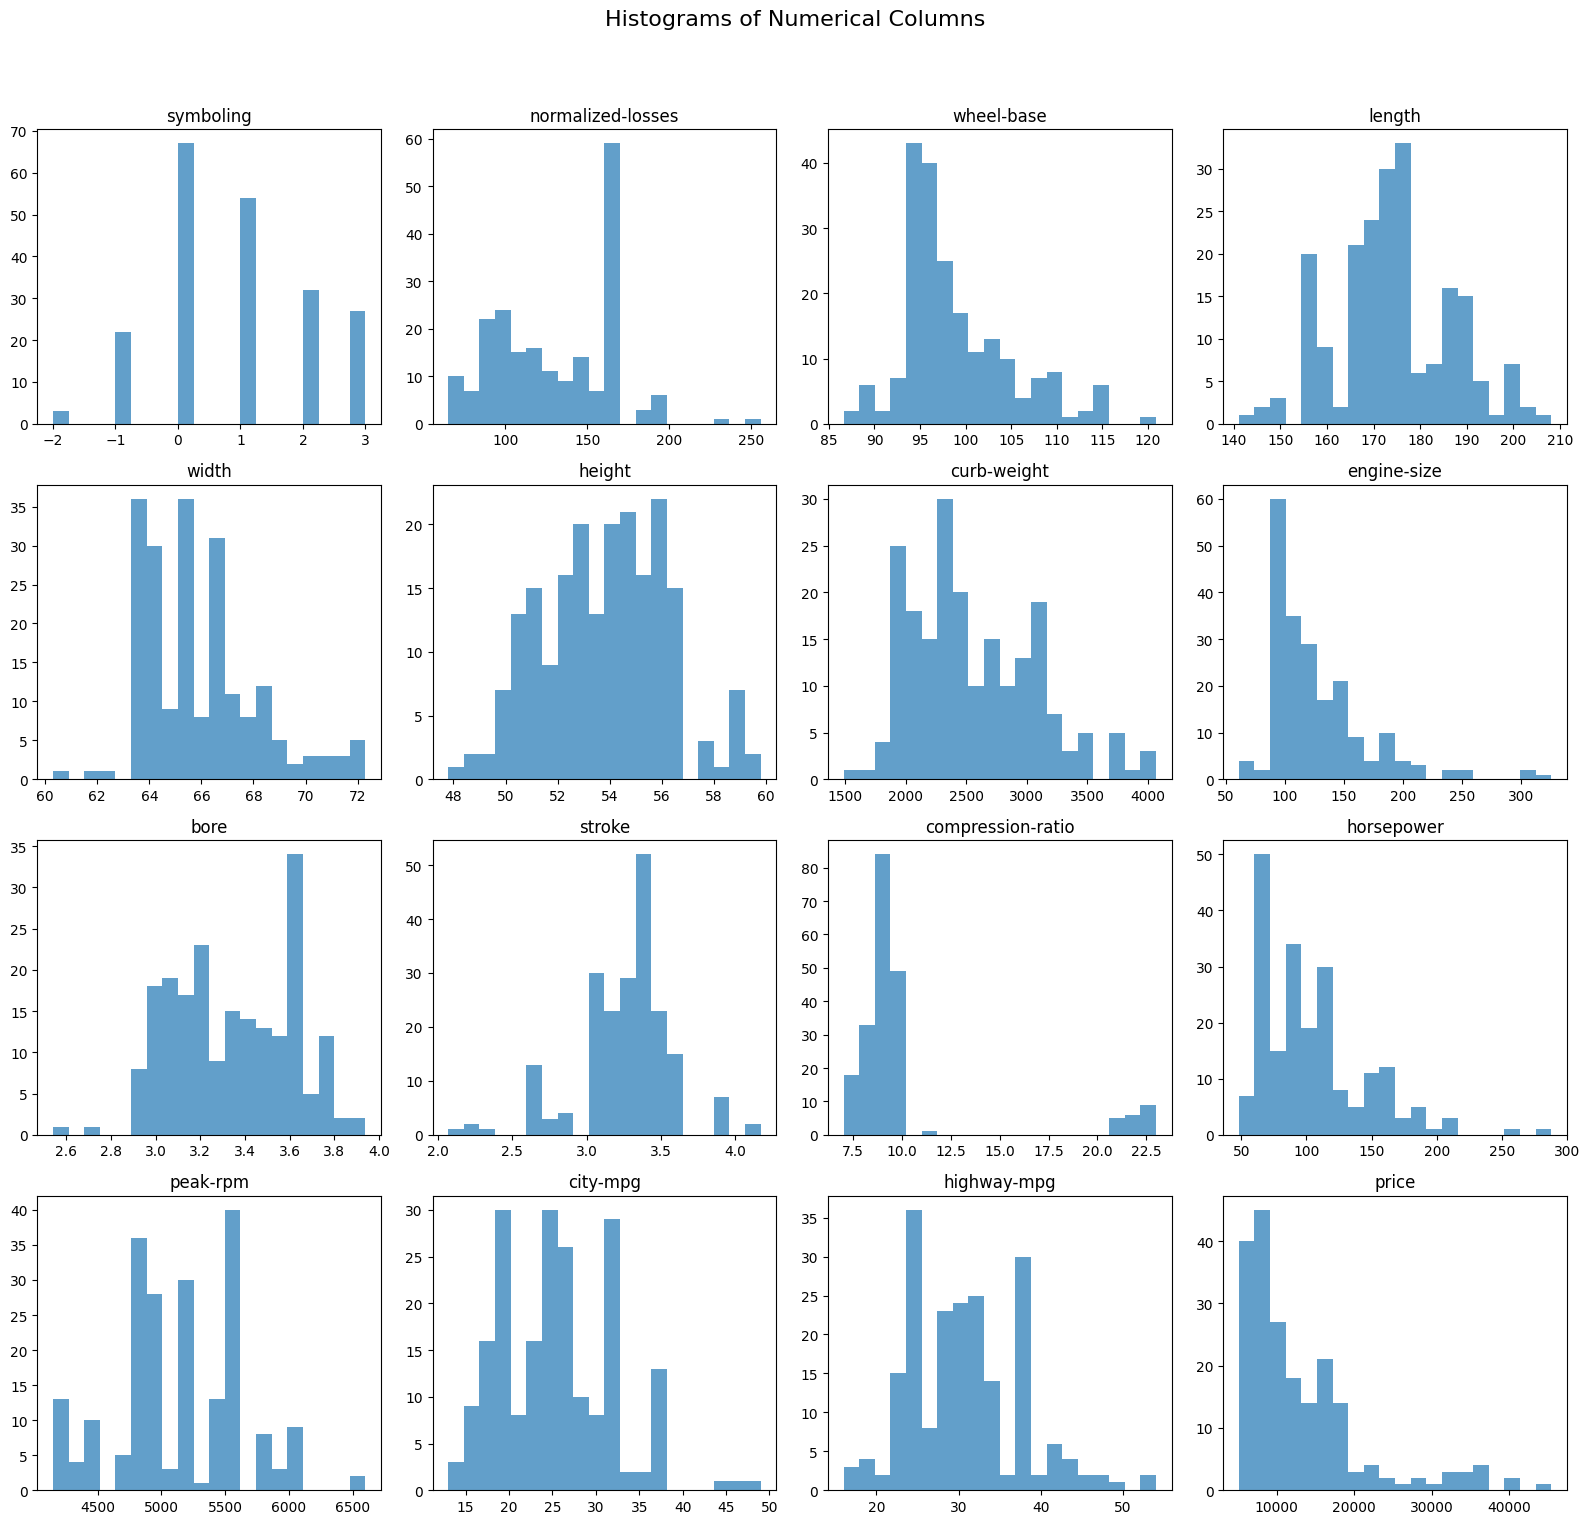

In [449]:
rows, cols = 4, 4
fig, axes = plt.subplots(rows, cols, figsize=(16, 16))
fig.suptitle('Histograms of Numerical Columns', fontsize=16)
numerical_column_names = numerical_df.columns

for i in range(rows):
    for j in range(cols):
        if i * cols + j < len(numerical_column_names):
            column_name = numerical_column_names[i * cols + j]
            axes[i, j].hist(df[column_name], bins=20, alpha=0.7)
            axes[i, j].set_title(column_name)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Box Plot of Numerical Columns

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dat

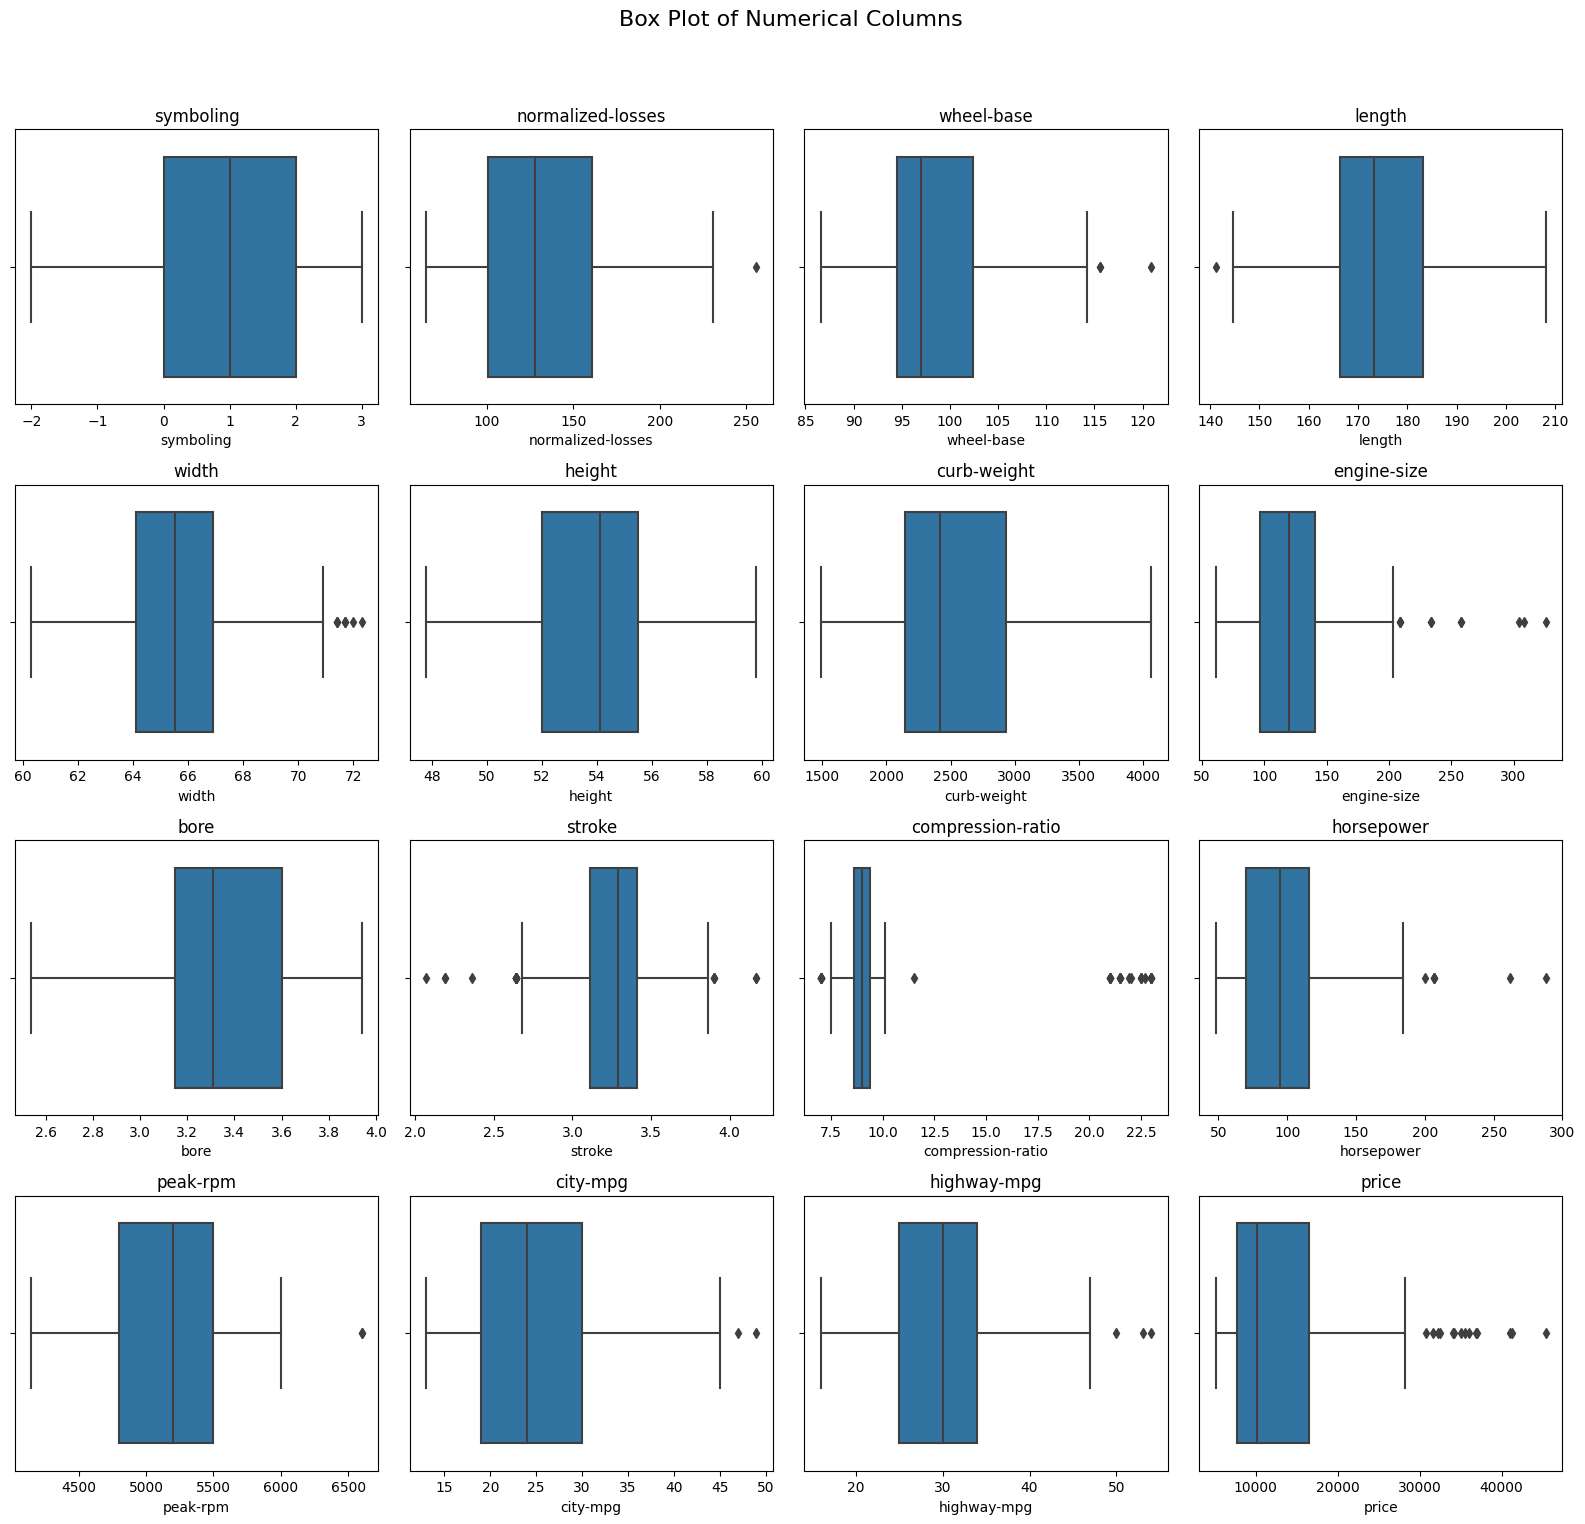

In [450]:
rows, cols = 4, 4
fig, axes = plt.subplots(rows, cols, figsize=(16, 16))
fig.suptitle('Box Plot of Numerical Columns', fontsize=16)
numerical_column_names = numerical_df.columns

for i in range(rows):
    for j in range(cols):
        if i * cols + j < len(numerical_column_names):
            column_name = numerical_column_names[i * cols + j]
            sns.boxplot(x=column_name, data=numerical_df, ax=axes[i, j])
            axes[i, j].set_title(column_name)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
   


## Number of outliers

In [451]:
from IPython.display import display

for column in numerical_df:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_lower = df[df[column] < lower_bound]
    outliers_upper = df[df[column] > upper_bound]

    display(f"Column '{column}':")
    print(f"Number of outliers (lower outlier): {len(outliers_lower)}")
    print(f"Number of outliers (upper outlier): {len(outliers_upper)}")
    print()

"Column 'symboling':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 0



"Column 'normalized-losses':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 1



"Column 'wheel-base':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 3



"Column 'length':"

Number of outliers (lower outlier): 1
Number of outliers (upper outlier): 0



"Column 'width':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 8



"Column 'height':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 0



"Column 'curb-weight':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 0



"Column 'engine-size':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 10



"Column 'bore':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 0



"Column 'stroke':"

Number of outliers (lower outlier): 15
Number of outliers (upper outlier): 5



"Column 'compression-ratio':"

Number of outliers (lower outlier): 7
Number of outliers (upper outlier): 21



"Column 'horsepower':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 6



"Column 'peak-rpm':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 2



"Column 'city-mpg':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 2



"Column 'highway-mpg':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 3



"Column 'price':"

Number of outliers (lower outlier): 0
Number of outliers (upper outlier): 14



## Let's build the correlation matrix first in the form of a table and then depict it graphically

In [452]:
corr_matrix = numerical_df.corr()
corr_matrix = corr_matrix.round(2)
corr_matrix

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.00,0.45,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.09,0.01,-0.18,0.07,0.27,-0.04,0.03,-0.08
normalized-losses,0.45,1.00,0.04,0.15,0.20,-0.35,0.25,0.29,0.08,0.10,-0.10,0.35,0.20,-0.34,-0.30,0.30
wheel-base,-0.53,0.04,1.00,0.87,0.80,0.59,0.78,0.57,0.47,0.16,0.25,0.35,-0.36,-0.47,-0.54,0.58
length,-0.36,0.15,0.87,1.00,0.84,0.49,0.88,0.68,0.59,0.13,0.16,0.55,-0.28,-0.67,-0.70,0.69
width,-0.23,0.20,0.80,0.84,1.00,0.28,0.87,0.74,0.55,0.18,0.18,0.64,-0.22,-0.64,-0.68,0.71
height,-0.54,-0.35,0.59,0.49,0.28,1.00,0.30,0.07,0.13,-0.07,0.26,-0.11,-0.32,-0.05,-0.11,0.15
curb-weight,-0.23,0.25,0.78,0.88,0.87,0.30,1.00,0.85,0.64,0.17,0.15,0.75,-0.27,-0.76,-0.80,0.81
engine-size,-0.11,0.29,0.57,0.68,0.74,0.07,0.85,1.00,0.55,0.19,0.03,0.81,-0.24,-0.65,-0.68,0.85
bore,-0.09,0.08,0.47,0.59,0.55,0.13,0.64,0.55,1.00,-0.05,0.00,0.57,-0.21,-0.61,-0.60,0.52
stroke,0.01,0.10,0.16,0.13,0.18,-0.07,0.17,0.19,-0.05,1.00,0.18,0.07,-0.03,-0.05,-0.05,0.09


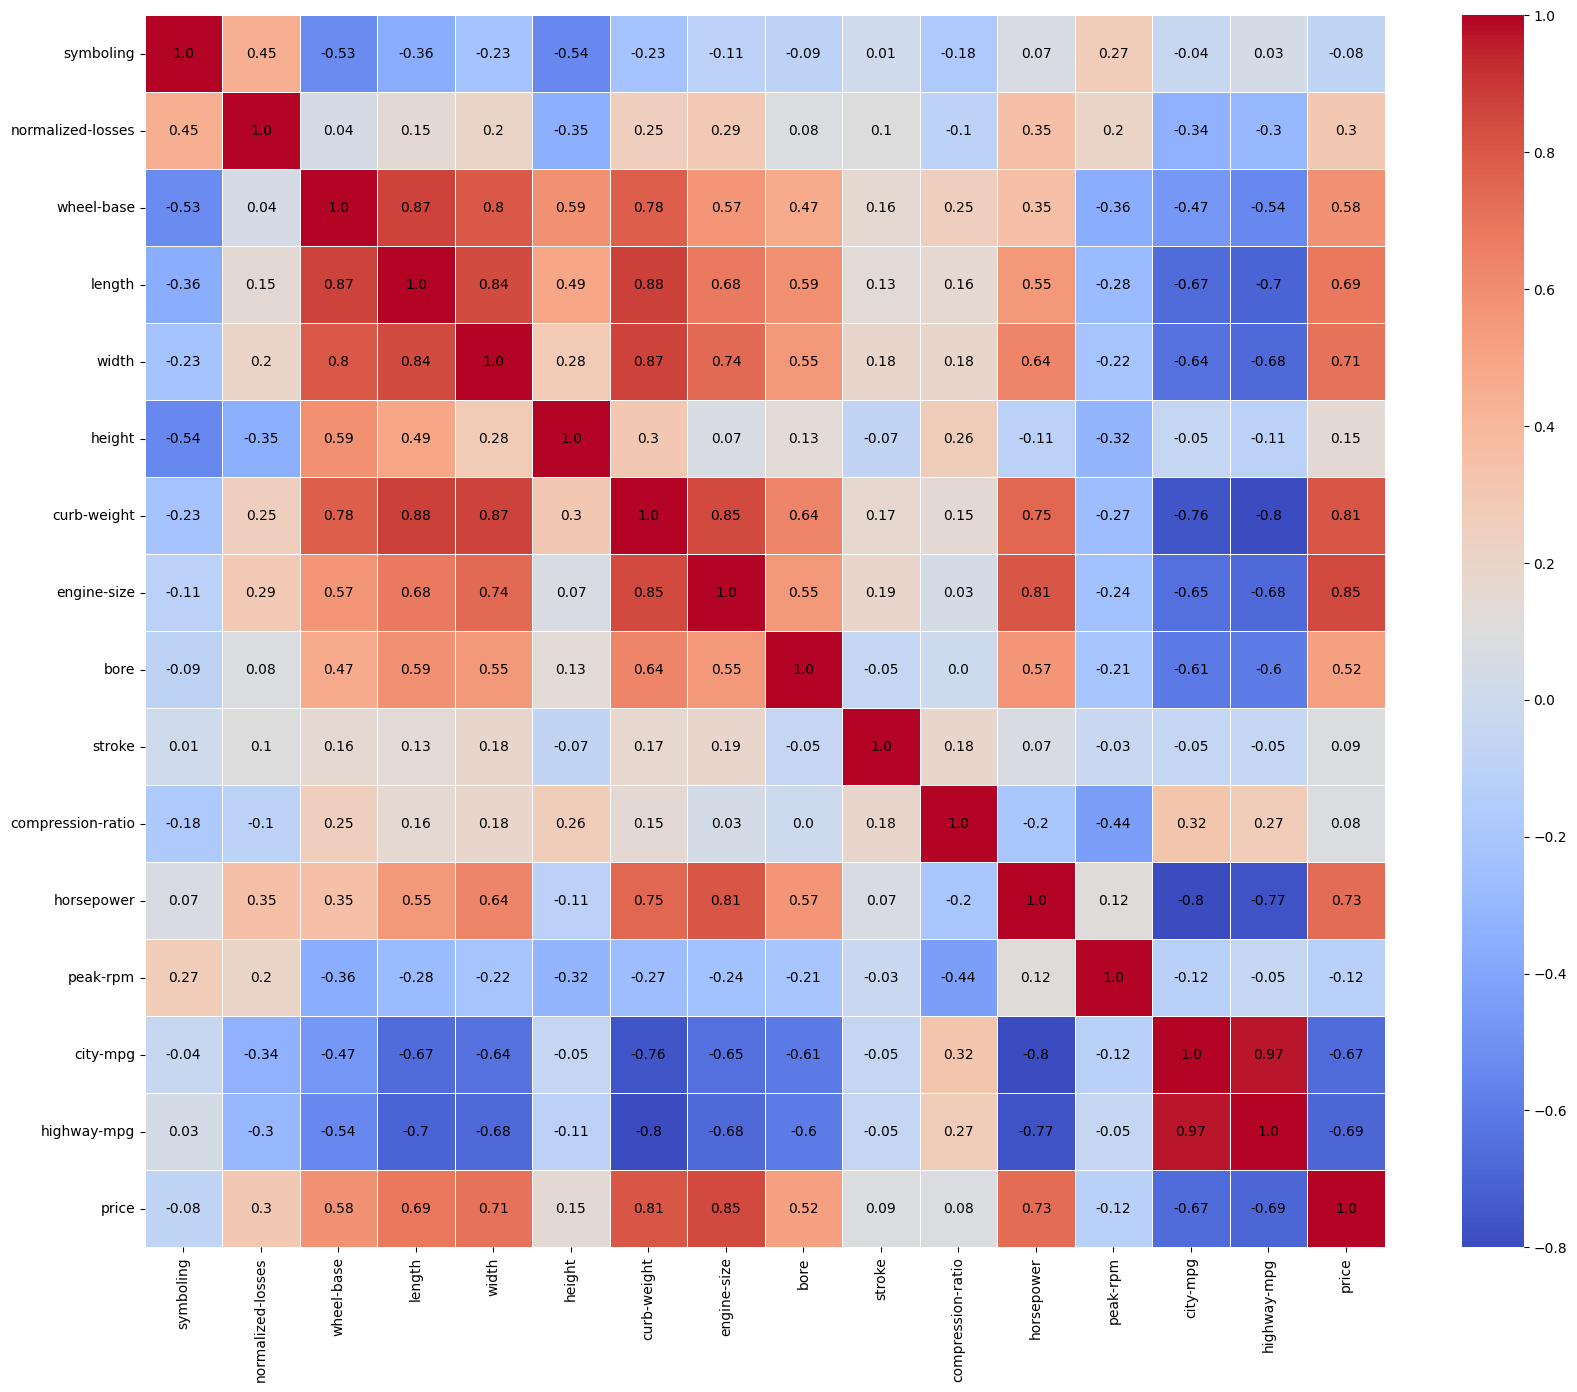

In [453]:
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = plt.text(j + 0.5, i + 0.5, f"{corr_matrix.iloc[i, j]}",
                        ha='center', va='center', color='black')
plt.show()

## Building pair plots

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dat

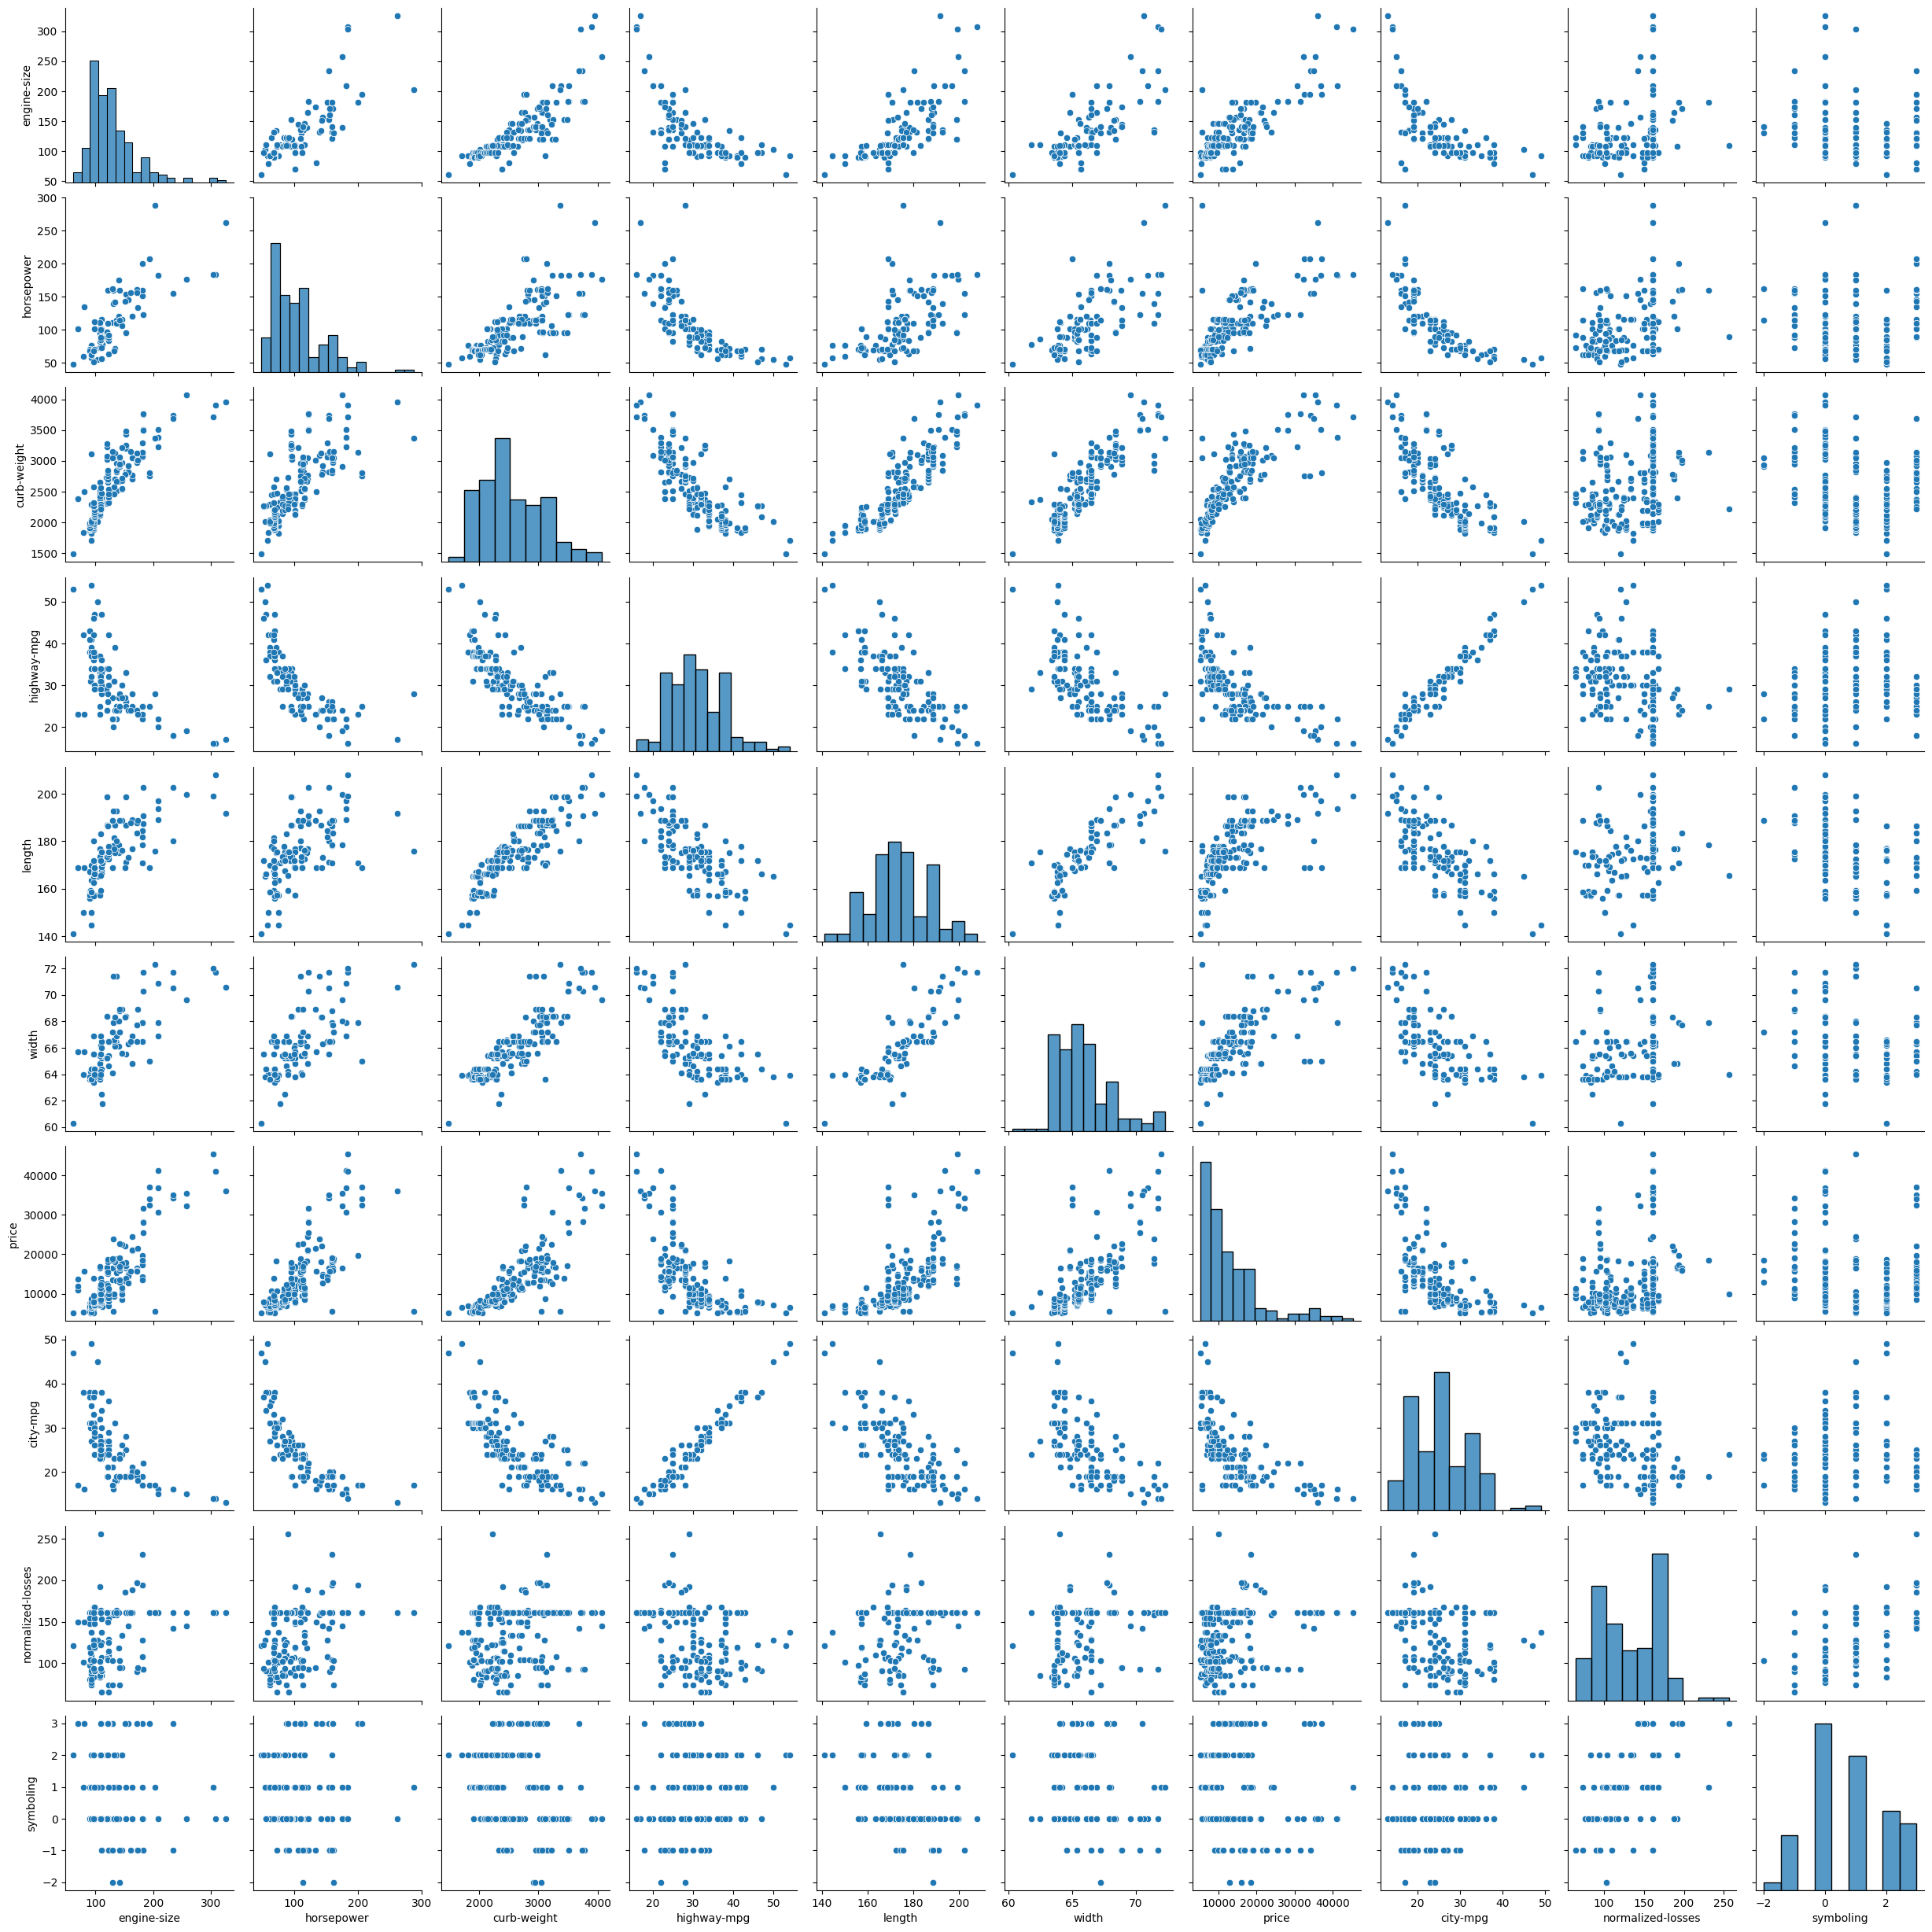

In [454]:
columns_to_compare = [
    'engine-size', 'horsepower', 'curb-weight', 'highway-mpg',
    'length', 'width', 'price', 'city-mpg',
    'normalized-losses', 'symboling'
]
subset_data = df[columns_to_compare]
sns.pairplot(subset_data)
plt.show()

## Let's take a closer look at some pairs of columns.


engine-size and horsepower: These two columns are highly correlated, so these can be compared to see how one parameter changes relative to the other.

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


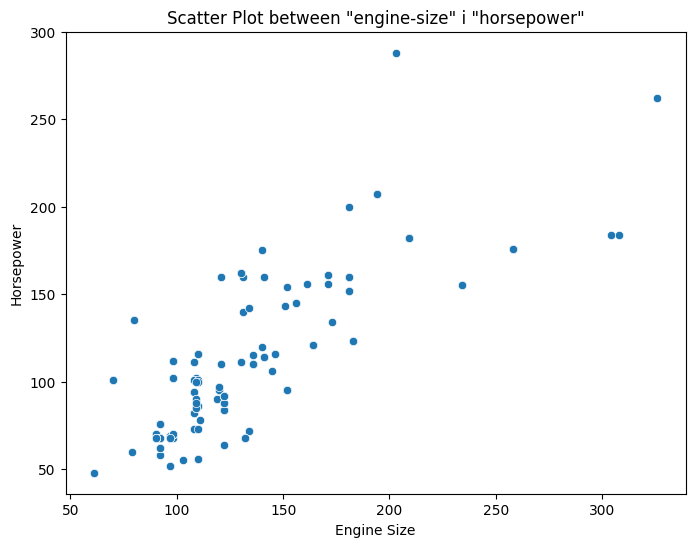

In [455]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='engine-size', y='horsepower', data=df)
plt.title('Scatter Plot between "engine-size" і "horsepower"')
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.show()

curb-weight and highway-mpg: These columns also have a correlation, and comparing them can show how the weight of a car affects its fuel consumption on the highway.

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


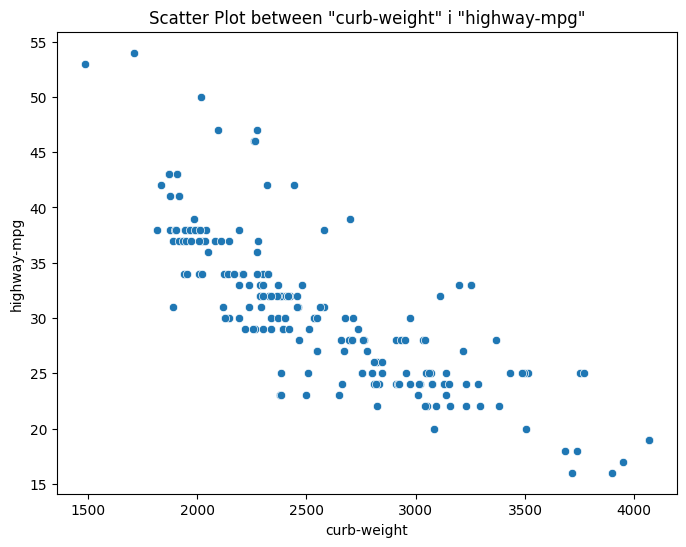

In [456]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='curb-weight', y='highway-mpg', data=df)
plt.title('Scatter Plot between "curb-weight" і "highway-mpg"')
plt.xlabel('curb-weight')
plt.ylabel('highway-mpg')
plt.show()

length and width: This pair of columns can help determine how the dimensions of a vehicle affect each other.

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


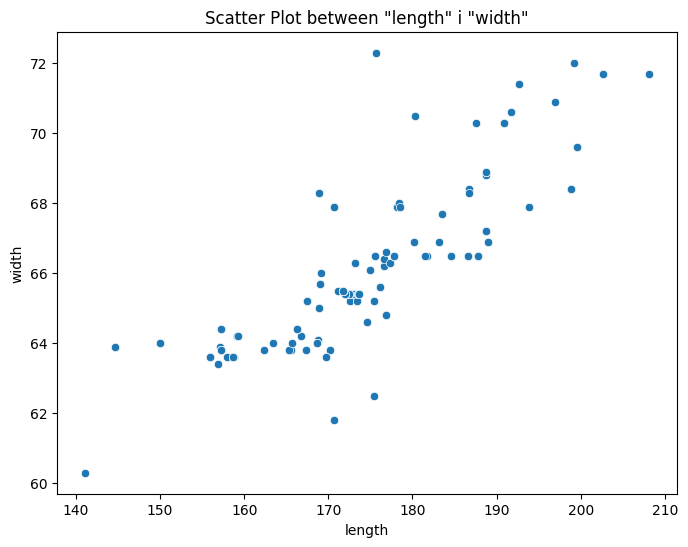

In [457]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='length', y='width', data=df)
plt.title('Scatter Plot between "length" і "width"')
plt.xlabel('length')
plt.ylabel('width')
plt.show()

price and engine-size: These two columns are also highly correlated, and comparing them can show how the price of a car depends on the engine size.

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


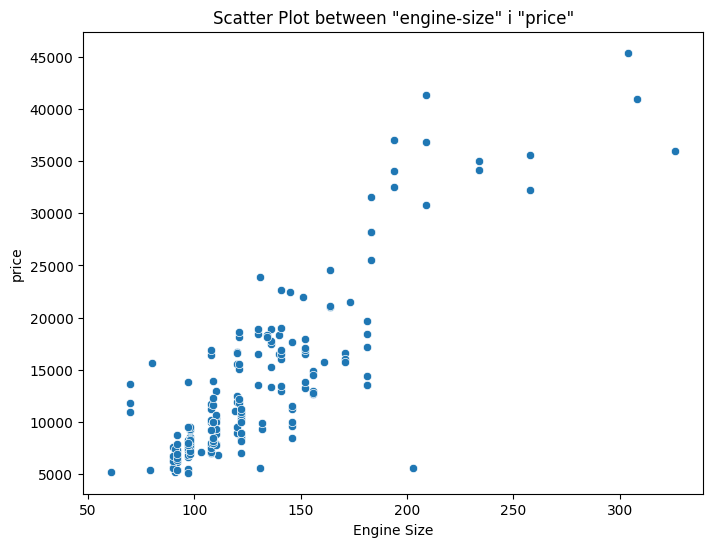

In [458]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='engine-size', y='price', data=df)
plt.title('Scatter Plot between "engine-size" і "price"')
plt.xlabel('Engine Size')
plt.ylabel('price')
plt.show()

city-mpg and highway-mpg: These two columns can be compared to determine how fuel consumption in the city differs from fuel consumption on the highway.

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


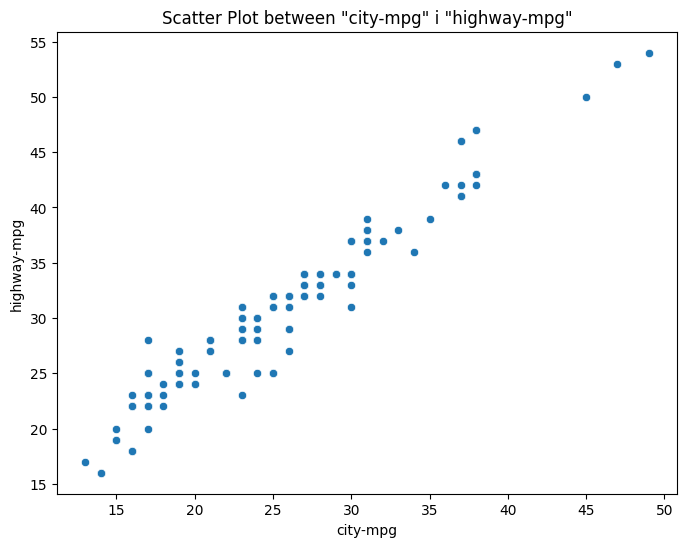

In [459]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='city-mpg', y='highway-mpg', data=df)
plt.title('Scatter Plot between "city-mpg" і "highway-mpg"')
plt.xlabel('city-mpg')
plt.ylabel('highway-mpg')
plt.show()

normalized-losses and symboling: This pair of columns can help determine how an insurance rating affects accident losses.

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


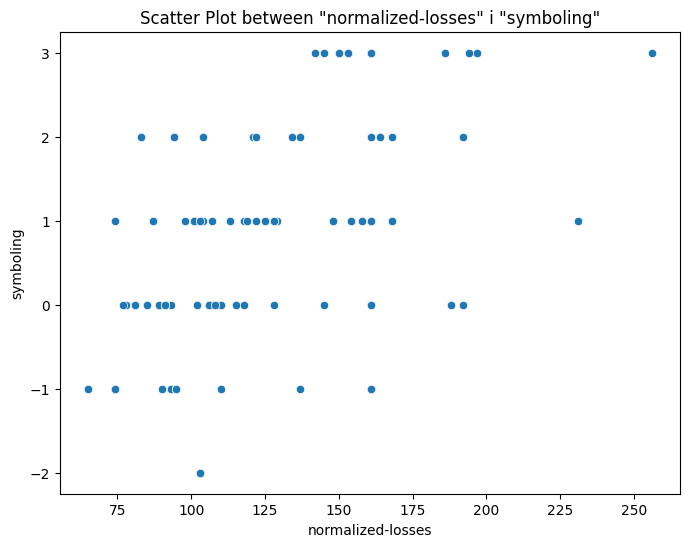

In [460]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='normalized-losses', y='symboling', data=df)
plt.title('Scatter Plot between "normalized-losses" і "symboling"')
plt.xlabel('normalized-losses')
plt.ylabel('symboling')
plt.show()

horsepower and price: These two columns can be compared to see how the horsepower of a car affects its price.

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


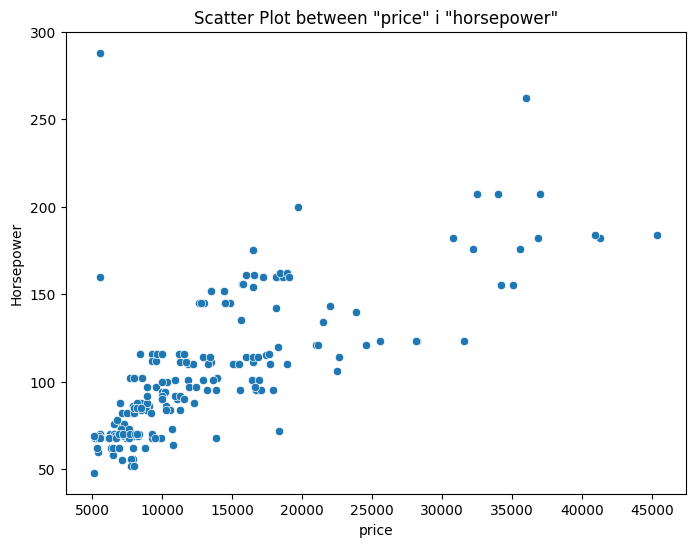

In [461]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='horsepower', data=df)
plt.title('Scatter Plot between "price" і "horsepower"')
plt.xlabel('price')
plt.ylabel('Horsepower')
plt.show()

engine-size and length: This pair of columns can help determine if there is a relationship between engine size and overall vehicle length.

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


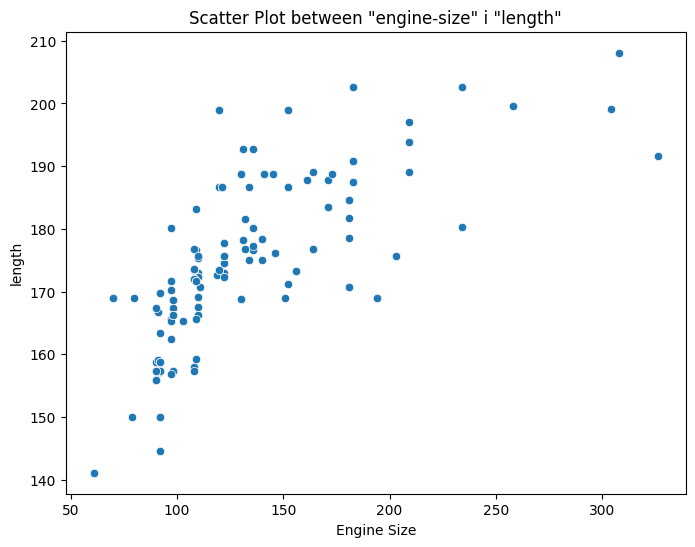

In [462]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='engine-size', y='length', data=df)
plt.title('Scatter Plot between "engine-size" і "length"')
plt.xlabel('Engine Size')
plt.ylabel('length')
plt.show()

## Graphs of distribution of numerical characteristics by categorical factors

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


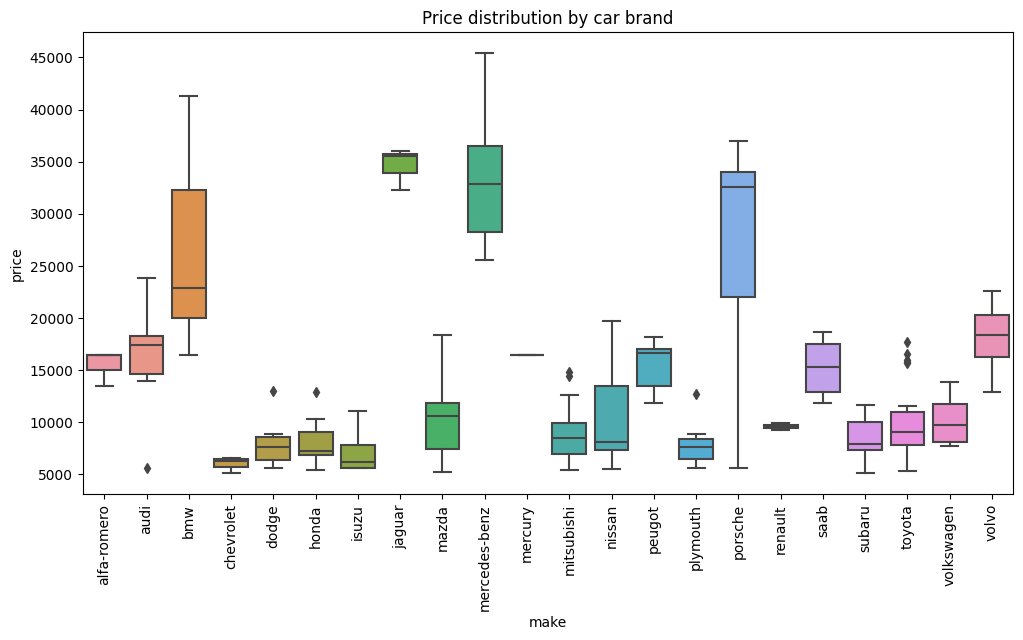

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


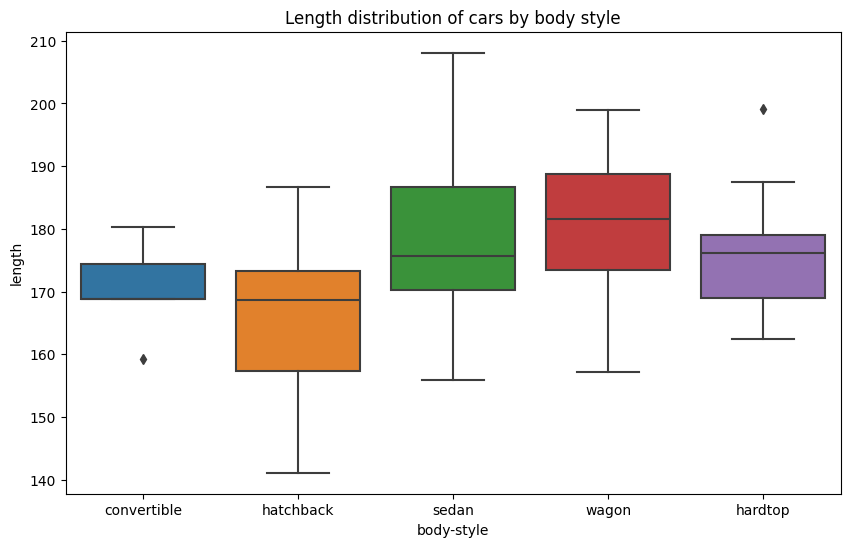

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


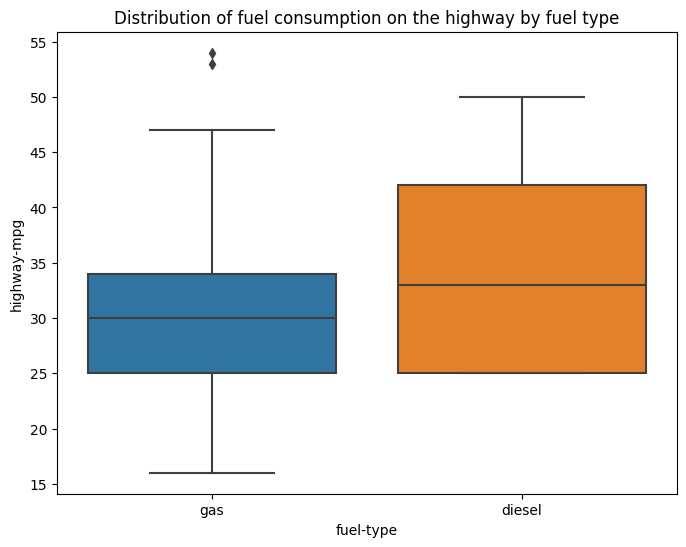

In [463]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='make', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Price distribution by car brand')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='body-style', y='length', data=df)
plt.title('Length distribution of cars by body style')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='fuel-type', y='highway-mpg', data=df)
plt.title('Distribution of fuel consumption on the highway by fuel type')
plt.show()

## Analysis of categorical columns. Building countplot and Pie Chart for each column

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


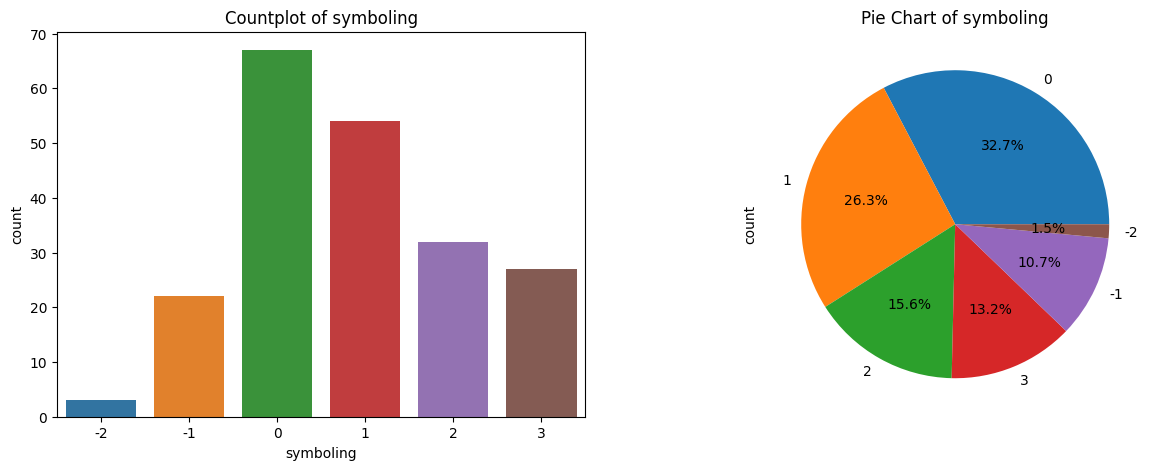

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


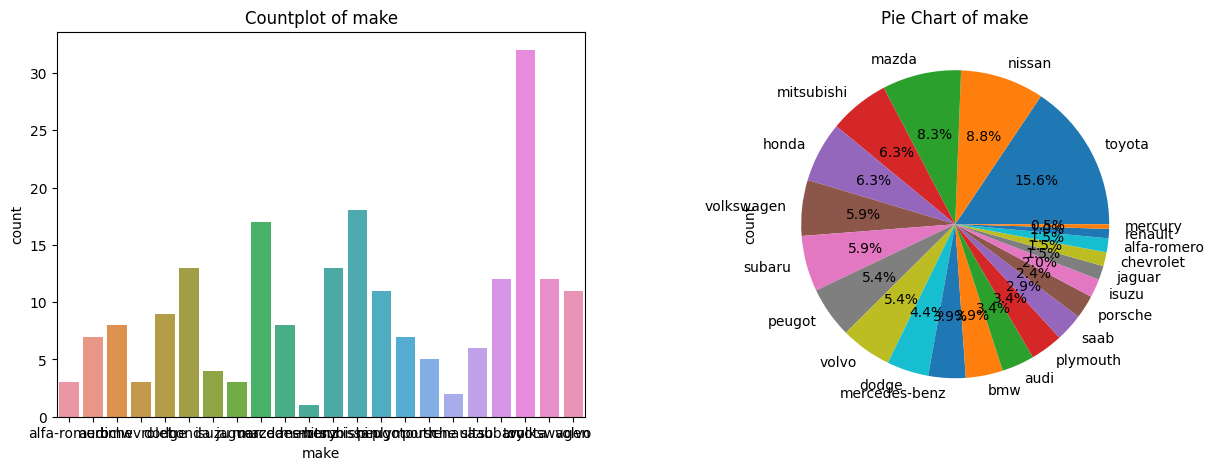

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


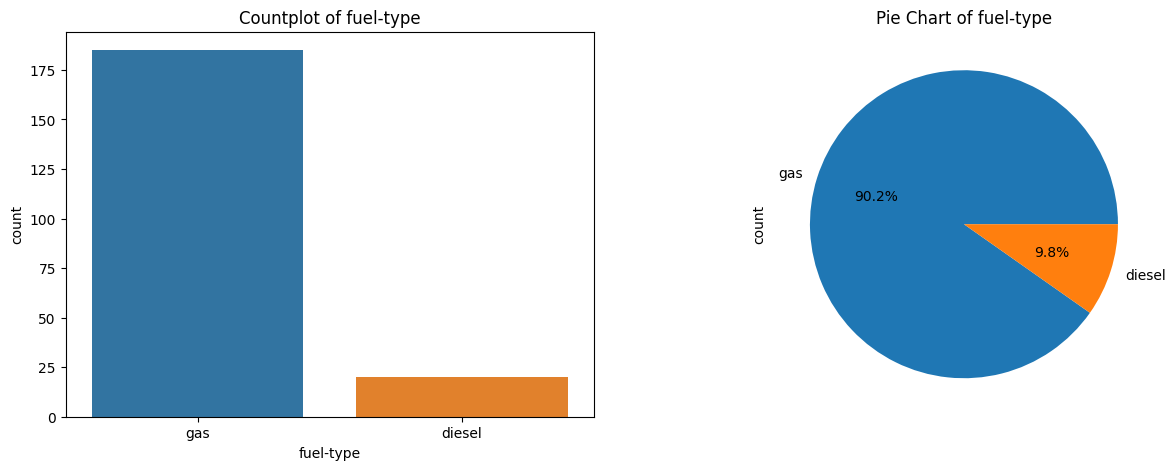

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


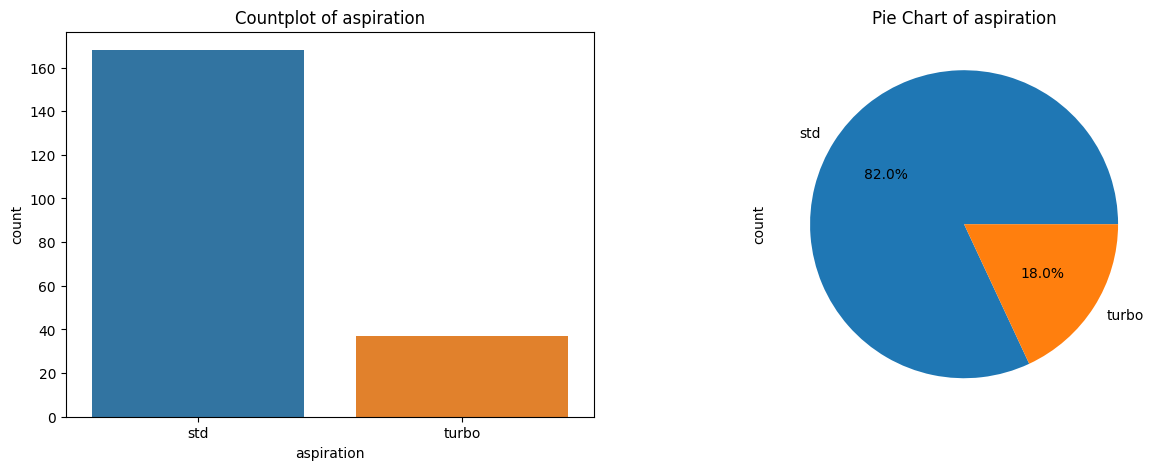

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


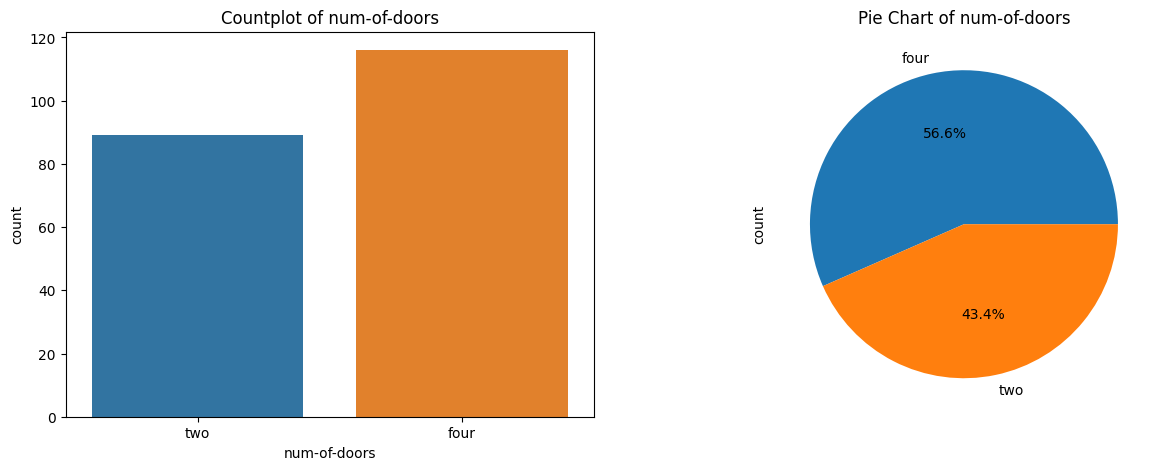

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


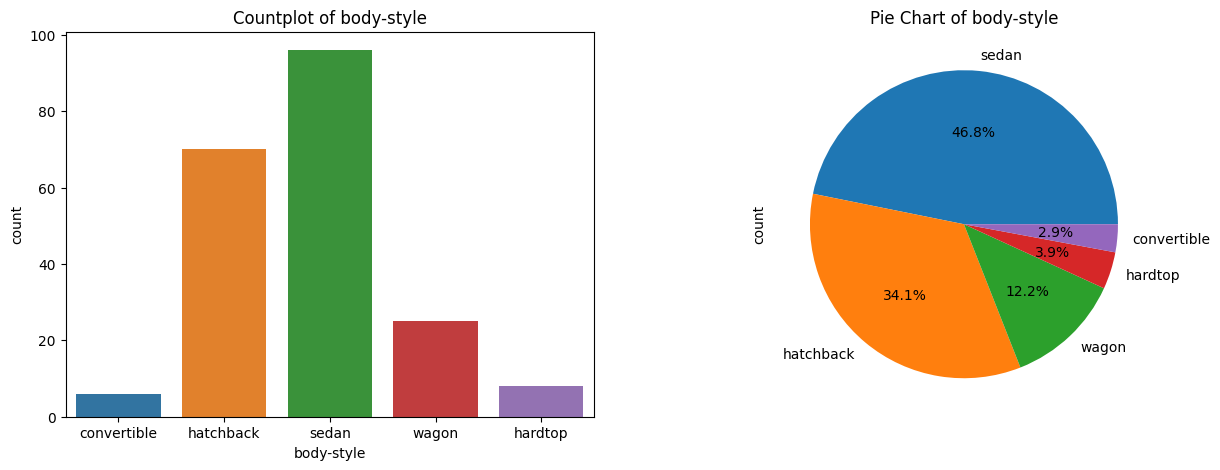

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


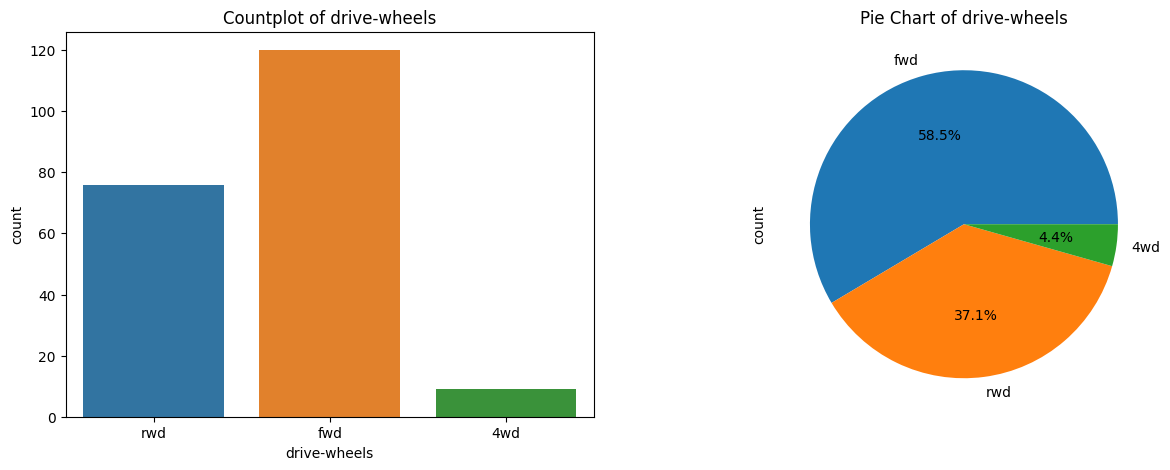

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


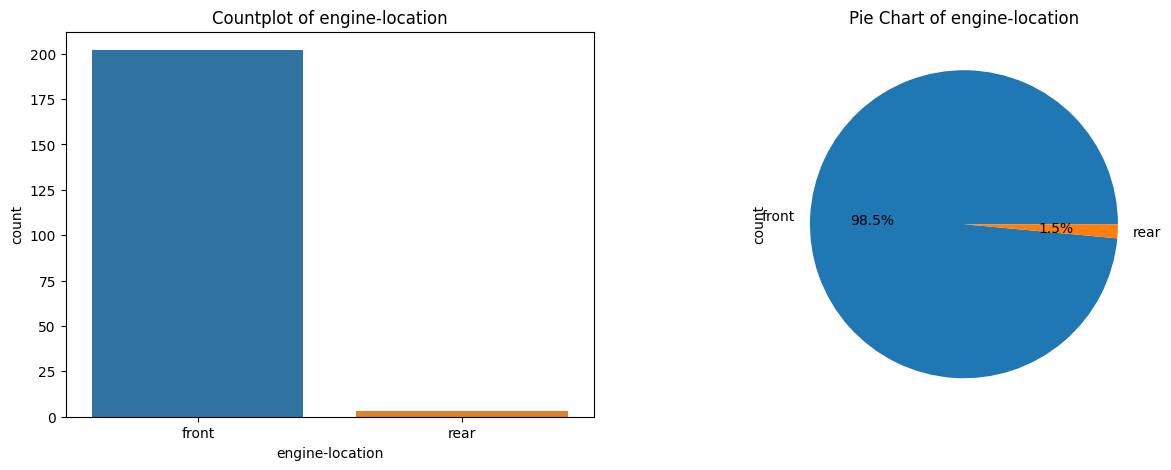

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


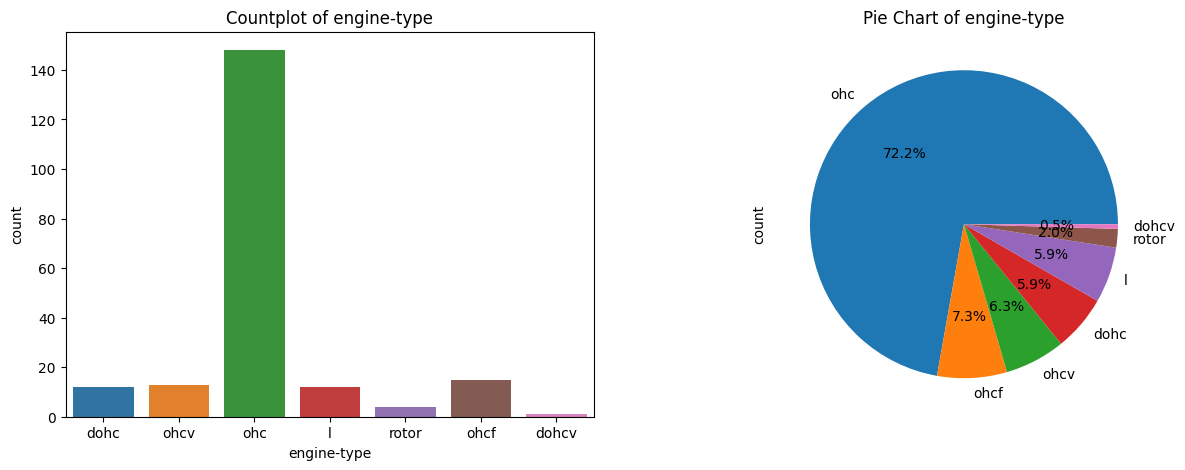

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


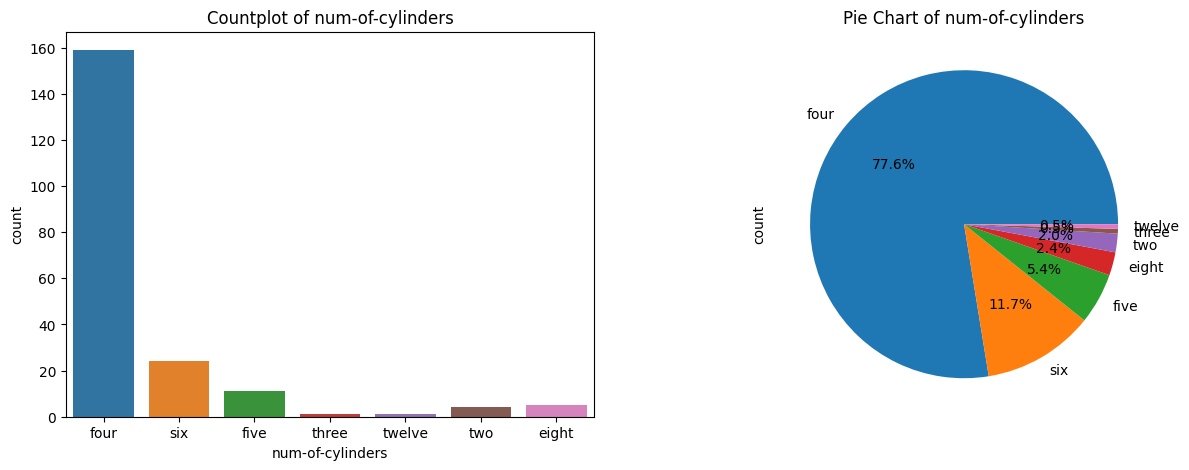

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


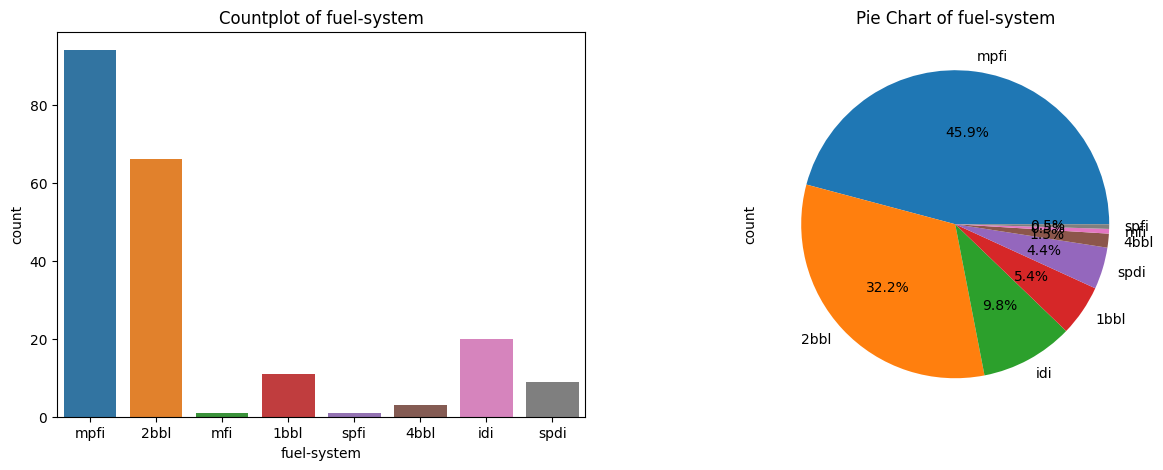

In [464]:

categorical_columns = ['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']

for column in categorical_columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5)) 
    sns.countplot(x=column, data=df, ax=ax1)
    ax1.set_title(f'Countplot of {column}')
    df[column].value_counts().plot.pie(autopct='%1.1f%%', ax=ax2)
    ax2.set_title(f'Pie Chart of {column}')
    
    plt.show()


## Average Price Range of Cars

/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kseniiavoropaieva/Documents/my_projects/Automobile_Dataset/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


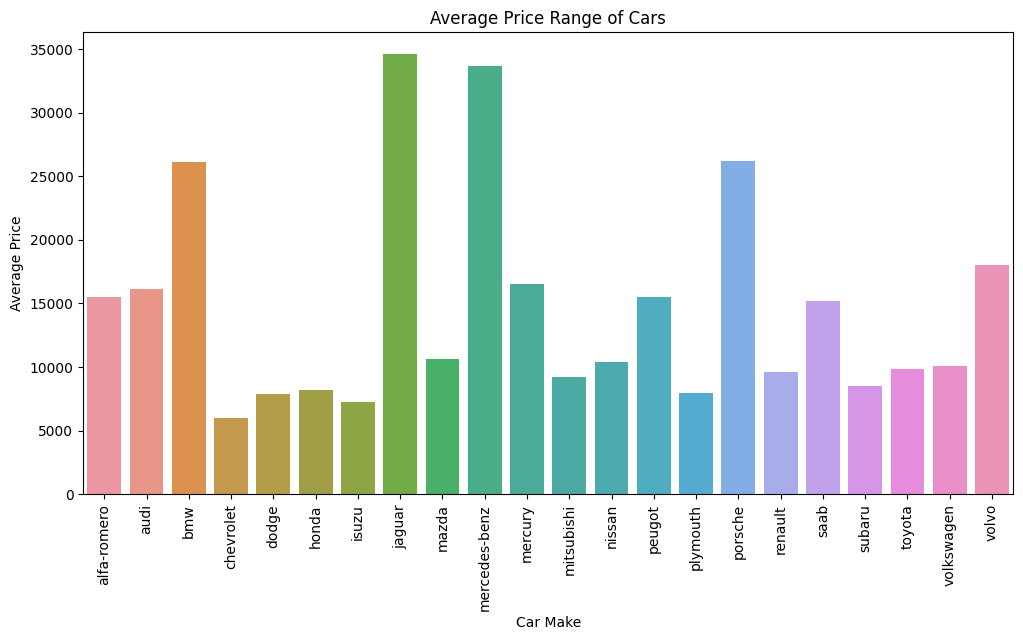

In [465]:
plt.figure(figsize=(12, 6))
sns.barplot(x='make', y='price', data=df, errorbar=None)
plt.xticks(rotation=90)
plt.xlabel('Car Make')
plt.ylabel('Average Price')
plt.title('Average Price Range of Cars')
plt.show()